# Loading Data

In [1]:
data_dir = '/home/vinay/Downloads/projects/data/'
import pandas as pd
df_wz = pd.read_csv(data_dir+'orderbook_resolution_5_2021-03-01_2021-03-24_wazirx.csv')
df_wz['timestamp'] = pd.to_datetime(df_wz['timestamp'])

In [2]:
df_wz.head(4)

,timestamp,exchange,symbol,bid_0_price,ask_0_price,midprice
0,2021-03-01 20:32:05,wazirx,USDTINR,76.76,76.9,76.83
1,2021-03-01 20:32:05,wazirx,BTCINR,3710743.00,3716553.0,3713648.00
2,2021-03-01 20:32:05,wazirx,ETHINR,117505.00,117700.0,117602.50
3,2021-03-01 20:32:10,wazirx,BTCINR,3710743.00,3716553.0,3713648.00


In [3]:
df_ftx = pd.read_csv(data_dir+'orderbook_resolution_5_2021-03-01_2021-03-24_ftx.csv')
df_ftx['timestamp'] = pd.to_datetime(df_ftx['timestamp'])
df_ftx.head(4)

,timestamp,exchange,symbol,bid_0_price,ask_0_price,midprice
0,2021-03-01 20:32:05,ftx,ETHUSD,1534.8000,1535.2000,1535.00000
1,2021-03-01 20:32:05,ftx,BTCUSD,48344.0000,48351.0000,48347.50000
2,2021-03-01 20:32:05,ftx,USDTUSD,1.0011,1.0012,1.00115
3,2021-03-01 20:32:10,ftx,ETHUSD,1534.9000,1535.0000,1534.95000


In [11]:
len(df_wz),len(df_ftx)

(1062827, 1151397)

In [10]:
df_wz['slippage_frac'] = (df_wz['ask_0_price'] - df_wz['bid_0_price'])/df_wz['bid_0_price']
df_ftx['slippage_frac'] = (df_ftx['ask_0_price'] - df_ftx['bid_0_price'])/df_ftx['bid_0_price']

,timestamp,exchange,symbol,bid_0_price,ask_0_price,midprice
0,2021-03-01 20:32:05,wazirx,USDTINR,76.76,76.90,76.830
1,2021-03-01 20:32:05,wazirx,BTCINR,3710743.00,3716553.00,3713648.000
2,2021-03-01 20:32:05,wazirx,ETHINR,117505.00,117700.00,117602.500
3,2021-03-01 20:32:10,wazirx,BTCINR,3710743.00,3716553.00,3713648.000
4,2021-03-01 20:32:10,wazirx,USDTINR,76.73,76.76,76.745
...,...,...,...,...,...,...
1062822,2021-03-24 12:58:35,wazirx,BTCINR,4220422.00,4224575.00,4222498.500
1062823,2021-03-24 12:58:35,wazirx,ETHINR,129905.90,129996.70,129951.300
1062824,2021-03-24 12:58:40,wazirx,BTCINR,4220422.00,4224575.00,4222498.500
1062825,2021-03-24 12:58:40,wazirx,USDTINR,76.19,76.20,76.195


In [12]:
wzr_btc = df_wz[df_wz['symbol'] == 'BTCINR'][['timestamp','midprice']].copy().rename({'midprice':'midbtc'},axis=1).set_index('timestamp')
wzr_eth = df_wz[df_wz['symbol'] == 'ETHINR'][['timestamp','midprice']].copy().rename({'midprice':'mideth'},axis=1).set_index('timestamp')
usd_inr = df_wz[df_wz['symbol'] == 'USDTINR'][['timestamp','midprice']].copy().rename({'midprice':'usdinr'},axis=1).set_index('timestamp')
ftx_btcusd = df_ftx[df_ftx['symbol'] == 'BTCUSD'][['timestamp','midprice']].copy().rename({'midprice':'ftx_midbtc_usd'},axis=1).set_index('timestamp')
ftx_ethusd = df_ftx[df_ftx['symbol'] == 'ETHUSD'][['timestamp','midprice']].copy().rename({'midprice':'ftx_mideth_usd'},axis=1).set_index('timestamp')


In [13]:
t = pd.concat([wzr_btc,wzr_eth,usd_inr,ftx_btcusd,ftx_ethusd],join='inner',axis=1)
t['midbtc_ftx'] = t['ftx_midbtc_usd']*t['usdinr']
t['mideth_ftx'] = t['ftx_mideth_usd']*t['usdinr']
t.drop(labels=['ftx_midbtc_usd','ftx_mideth_usd'],axis=1,inplace=True)

In [14]:
t['time'] = pd.to_datetime(t.index)
t.head(2)
t.sort_index(axis=0,inplace=True)

In [15]:
# Checking to see if all the data is at 5s resolution.
time_diff = t['time'].diff(1).dt.total_seconds().dropna()
bad_ids = (time_diff != 5.0)
time_diff[bad_ids]

timestamp
2021-03-01 20:34:35    65.0
2021-03-01 20:45:55    10.0
2021-03-01 21:01:55    10.0
2021-03-01 21:35:15    10.0
2021-03-01 21:35:30    15.0
                       ... 
2021-03-24 12:36:00    10.0
2021-03-24 12:36:55    15.0
2021-03-24 12:37:25    15.0
2021-03-24 12:42:25    10.0
2021-03-24 12:57:50    60.0
Name: time, Length: 4266, dtype: float64

In [16]:
time_diff[bad_ids].describe()

count     4266.000000
mean       109.968354
std       1767.093090
min         10.000000
25%         10.000000
50%         50.000000
75%         65.000000
max      78650.000000
Name: time, dtype: float64

In [17]:
import numpy as np
np.where(np.array([True,False,True]))

(array([0, 2]),)

In [18]:

bad_index = np.where(bad_ids.values)

In [12]:
# missing values
bad_index[0].shape[0]*100/len(t)


1.4105230441639858

In [13]:
t.iloc[bad_index[0][0]-2:bad_index[0][0]+3]

,midbtc,mideth,usdinr,midbtc_ftx,mideth_ftx,time
timestamp,,,,,,
2021-03-01 20:33:20,3713833.5,117602.50,76.810,3.718833e+06,118045.44850,2021-03-01 20:33:20
2021-03-01 20:33:25,3714206.0,117602.50,76.815,3.718499e+06,118053.13275,2021-03-01 20:33:25
2021-03-01 20:33:30,3715557.0,117602.50,76.815,3.718345e+06,118053.13275,2021-03-01 20:33:30
2021-03-01 20:34:35,3718089.5,117338.45,76.765,3.713737e+06,118022.34925,2021-03-01 20:34:35
2021-03-01 20:34:40,3715742.5,117353.05,76.765,3.712355e+06,117976.29025,2021-03-01 20:34:40


# Analysis of the missing data- Not needed for all practical purposes

In [14]:
from collections import Counter
missing_ids = pd.DataFrame({'misid':bad_index[0]})
missing_ids.iloc[0]

misid    17
Name: 0, dtype: int64

In [15]:
import time, datetime
from datetime import datetime, timedelta

(t.iloc[18].time - t.iloc[17].time).total_seconds()

65.0

In [16]:
t.iloc[17:19]

,midbtc,mideth,usdinr,midbtc_ftx,mideth_ftx,time
timestamp,,,,,,
2021-03-01 20:33:30,3715557.0,117602.50,76.815,3.718345e+06,118053.13275,2021-03-01 20:33:30
2021-03-01 20:34:35,3718089.5,117338.45,76.765,3.713737e+06,118022.34925,2021-03-01 20:34:35


In [17]:
missing_ids['cont_chunk_sz'] = (missing_ids-missing_ids.shift(1))


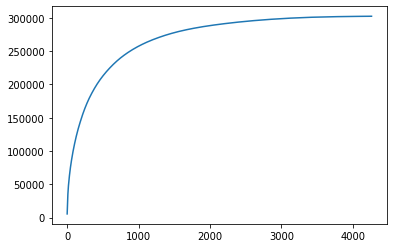

In [18]:
import matplotlib.pyplot as plt
cumsum = missing_ids.sort_values(by='cont_chunk_sz',ascending=False)['cont_chunk_sz'].cumsum().values[:-1]
plt.plot(cumsum)


In [19]:
cumsum[1]


8914.0

In [20]:
pct_data_covered = cumsum*100/cumsum[-1]
np.where(pct_data_covered>70)[0][0]

493

# Working only with good data

In [19]:
# Just do forward fill and proceed
t['date'] = t['time'].dt.date
take_days = t.groupby('date').count()['time']>=15000
take_days_list = take_days[take_days].index
def good_days(ele):
    return ele in take_days_list


In [20]:
new_t = t[t['date'].apply(good_days)].copy()


In [21]:
new_t.groupby('date').first()

,midbtc,mideth,usdinr,midbtc_ftx,mideth_ftx,time
date,,,,,,
2021-03-02,3701550.0,116310.10,76.805,3.726771e+06,116981.69550,2021-03-02 00:00:50
2021-03-04,3884243.5,122613.10,75.695,3.891783e+06,122909.75625,2021-03-04 00:01:05
2021-03-05,3700573.5,117605.90,75.930,3.674556e+06,117467.50650,2021-03-05 00:00:00
2021-03-06,3710499.0,115876.35,76.005,3.690195e+06,115941.82725,2021-03-06 00:00:00
2021-03-07,3637927.0,121325.00,75.810,3.665110e+06,122217.09150,2021-03-07 00:00:00
2021-03-13,4328249.5,133529.40,75.555,4.334590e+06,134091.23625,2021-03-13 00:01:45
2021-03-14,4482849.0,142002.80,74.685,4.489913e+06,142364.54700,2021-03-14 00:01:40
2021-03-23,4304044.5,134386.10,75.645,4.310441e+06,134545.97925,2021-03-23 00:00:00


In [22]:
new_t.groupby('date').last()

,midbtc,mideth,usdinr,midbtc_ftx,mideth_ftx,time
date,,,,,,
2021-03-02,3710609.0,117181.00,76.930,3.681024e+06,116145.06750,2021-03-02 23:59:55
2021-03-04,3700573.5,117605.90,75.930,3.672468e+06,117402.96600,2021-03-04 23:59:55
2021-03-05,3710499.0,115876.35,76.005,3.690841e+06,115964.62875,2021-03-05 23:59:55
2021-03-06,3636629.0,121325.00,75.810,3.663670e+06,122118.53850,2021-03-06 23:59:55
2021-03-07,3795499.5,124800.00,74.915,3.795156e+06,124677.28875,2021-03-07 23:59:55
2021-03-13,4477348.5,141675.00,74.610,4.491447e+06,142437.95100,2021-03-13 23:59:50
2021-03-14,4523796.0,140499.00,75.010,4.502925e+06,140272.45050,2021-03-14 23:59:55
2021-03-23,4210788.5,130097.15,75.820,4.232007e+06,130414.19100,2021-03-23 23:59:55


In [23]:
one_day = new_t[new_t['date'] == take_days_list[0]].copy()
# we need 17280 rows .. let's just forward fill it with linear inc

## Working on a single day 

In [34]:
resampled_data = one_day.resample('5s').asfreq().interpolate().drop(['time','date','usdinr'],axis=1)

In [35]:
resampled_data.head(3)

,midbtc,mideth,midbtc_ftx,mideth_ftx
timestamp,,,,
2021-03-02 00:00:50,3701550.0,116310.1,3.726771e+06,116981.6955
2021-03-02 00:00:55,3700439.5,116310.1,3.729574e+06,117020.0980
2021-03-02 00:01:00,3700439.5,116399.5,3.724934e+06,116798.2155


## All days data

In [36]:
import numpy as np
np.random.seed(0)
test_unseen_days = np.array([take_days_list[-1]])
rdm_take_days_list = np.random.permutation(take_days_list[:-1])
train_days = rdm_take_days_list[:-2]
valid_days  = rdm_take_days_list[-2:]


In [37]:
valid_days,test_unseen_days,train_days


(array([datetime.date(2021, 3, 13), datetime.date(2021, 3, 7)],
       dtype=object),
 array([datetime.date(2021, 3, 23)], dtype=object),
 array([datetime.date(2021, 3, 14), datetime.date(2021, 3, 5),
        datetime.date(2021, 3, 4), datetime.date(2021, 3, 6),
        datetime.date(2021, 3, 2)], dtype=object))

## Indicators

In [38]:
from custom_finta import TA
config = {
    "ti":{
        "MACD":[[5,10,10],[10,20,10],[15,30,10],[20,40,10],[25,50,10],[30,60,10],[35,70,10],[40,80,10],[45,90,10],[50,100,10]],
        "STOCH":[[10],[20],[30],[40],[50],[60],[70],[80],[90],[100]],
        "BBANDSSTDDIST":[[10],[20],[30],[40],[50],[60],[70],[80],[90],[100]],
        "PEAKMINUSTROUGH":[[10],[20],[30],[40],[50],[60],[70],[80],[90],[100]],
        "RSI":[[10],[20],[30],[40],[50],[60],[70],[80],[90],[100]]
    }
    
}

In [39]:
from collections import OrderedDict
class Preprocessor:
    def __init__(self):
        pass
    def __call__(self,df,col,ind_name,ind_values):
        prices = df[col]
        return getattr(self,ind_name)(prices,ind_values)
    def MACD(self,prices,ind_values):
        return (ind_values['MACD']-ind_values['SIGNAL'])/prices
    def PEAKMINUSTROUGH(self,prices,ind_values):
        return ind_values/prices
    def STOCH(self,prices,ind_values):
        return ind_values/100
    def RSI(self,prices,ind_values):
        return ind_values/100
    def BBANDSSTDDIST(self,prices,ind_values):
        return ind_values




def get_features(inpt_df,config,preprocessor):
    indicators = OrderedDict(config['ti'])
    features = {}
    for ind in indicators:
        for freq in indicators[ind]:
            for col in inpt_df.columns:
                out = getattr(TA,ind)({'close':inpt_df[col],'low':inpt_df[col],'high':inpt_df[col]},freq)
                out = preprocessor(inpt_df,col,ind,out)
                col_name = f'{col}_{ind}_{str(freq[0])}'
                features[col_name] = out
    return pd.DataFrame(features)
                
            

In [40]:
preprocessor = Preprocessor()
feat = get_features(resampled_data,config,preprocessor)

In [41]:
feat.describe()

,midbtc_MACD_5,mideth_MACD_5,midbtc_ftx_MACD_5,mideth_ftx_MACD_5,midbtc_MACD_10,mideth_MACD_10,midbtc_ftx_MACD_10,mideth_ftx_MACD_10,midbtc_MACD_15,mideth_MACD_15,...,midbtc_ftx_RSI_80,mideth_ftx_RSI_80,midbtc_RSI_90,mideth_RSI_90,midbtc_ftx_RSI_90,mideth_ftx_RSI_90,midbtc_RSI_100,mideth_RSI_100,midbtc_ftx_RSI_100,mideth_ftx_RSI_100
count,1.726200e+04,1.726200e+04,1.726200e+04,1.726200e+04,1.725200e+04,1.725200e+04,1.725200e+04,1.725200e+04,1.724200e+04,1.724200e+04,...,17191.000000,17191.000000,17181.000000,17181.000000,17181.000000,17181.000000,17171.000000,17171.000000,17171.000000,17171.000000
mean,3.485160e-09,-1.984114e-07,2.445006e-08,4.214507e-08,2.075527e-08,-2.318879e-07,-1.056182e-07,-1.260977e-07,3.171371e-08,-2.444401e-07,...,0.504645,0.508687,0.500348,0.520473,0.504592,0.508644,0.500423,0.520515,0.504532,0.508596
std,1.251812e-04,1.172040e-04,1.262377e-04,1.394382e-04,1.146621e-04,1.102367e-04,1.237344e-04,1.382963e-04,1.054726e-04,1.040379e-04,...,0.089504,0.096551,0.105931,0.185777,0.084309,0.091298,0.099706,0.177703,0.079919,0.086809
min,-7.717498e-04,-1.116456e-03,-7.569824e-04,-7.649732e-04,-5.552903e-04,-9.068915e-04,-7.384580e-04,-5.665095e-04,-4.791863e-04,-9.553495e-04,...,0.187029,0.186689,0.123371,0.021362,0.202601,0.197595,0.135488,0.029662,0.216648,0.207522
25%,-5.239825e-05,-3.135877e-05,-7.276722e-05,-7.793496e-05,-5.779144e-05,-3.429061e-05,-7.511230e-05,-8.313123e-05,-5.418821e-05,-3.420821e-05,...,0.448443,0.444994,0.441768,0.403289,0.451824,0.448202,0.446113,0.412306,0.454429,0.451738
50%,8.206836e-07,-1.702084e-08,-8.408427e-07,-1.206129e-06,-4.893136e-07,-5.022996e-09,-1.667802e-06,-1.832403e-06,-1.262437e-06,-7.186710e-08,...,0.502734,0.505632,0.492133,0.512449,0.502596,0.505357,0.492358,0.515401,0.502676,0.505370
75%,5.033689e-05,3.176934e-05,7.116567e-05,7.586985e-05,5.365709e-05,3.742637e-05,7.337375e-05,8.005071e-05,5.062242e-05,3.621887e-05,...,0.557641,0.564801,0.559082,0.635148,0.553584,0.560467,0.555637,0.627933,0.549845,0.557190
max,1.010360e-03,1.156364e-03,7.228690e-04,8.547084e-04,8.250739e-04,9.748294e-04,6.649726e-04,6.604037e-04,7.626157e-04,1.067187e-03,...,0.925397,0.924816,0.890545,0.992190,0.915702,0.908652,0.876541,0.991103,0.905859,0.892865


## Transforming the data 

In [42]:
from collections import defaultdict
class StdNorm:
    # Takes a DataFrame and returns a transformed DataFrame
    def __init__(self):
        self.train_stats = None
    def fit(self,x):
        if isinstance(x,pd.DataFrame):
            self.train_stats = x.describe().transpose()[['mean','std']]
        else:
            print('Data format not supported')
            exit()
    def transform(self,data):
        data_t = data.copy()
        return (data_t-self.train_stats['mean'])/self.train_stats['std']
    def fit_transfm(self,x):
        self.fit(x)
        return self.transform(x)
        

class PercentileTransfm:
    def __init__(self):
        self.train_stats = defaultdict()
    def fit(self,x,n_cls = 3,leave_as_class = False):
        self.train_stats['ncls'] = n_cls
        if isinstance(x,pd.DataFrame):
            for col in x.columns:
                _,out = pd.qcut(x[col],n_cls,retbins=True,duplicates='drop')
                out[0] = -math.inf
                out[-1] = math.inf
                self.train_stats[col] = out
        else:
            print('Data format not supported')
            exit()
    def transform(self,x,leave_as_class = False,n_cls=3):
        transformed_df = {}
        for col in x.columns:
            out = pd.cut(x[col],self.train_stats[col],labels=False)
            if leave_as_class:
                transformed_df[col] = out
            else:
                transformed_df[col] = out/self.train_stats['ncls']
        return pd.DataFrame(transformed_df)
    def fit_transfm(self,x,**kwargs):
        self.fit(x,**kwargs)
        return self.transform(x,**kwargs)
        
        
        

### Testing:1

In [33]:

import math
test_df = pd.DataFrame({'a':[0,9,8,3],'b':[10,8,7,-1]})
pct_transfm_1 = PercentileTransfm()
pct_transfm_2 = PercentileTransfm()
pct_transfm_2.fit(test_df,n_cls=3)
all(pct_transfm_1.fit_transfm(test_df,n_cls=3) == pct_transfm_2.transform(test_df))

True

### Testing:2

In [34]:
test_df = pd.DataFrame({'a':[0,9,8,3],'b':[10,8,7,-1]})
std_transfm_1 = StdNorm()
std_transfm_2 = StdNorm()
std_transfm_2.fit(test_df)
all(std_transfm_1.fit_transfm(test_df) == std_transfm_2.transform(test_df))

True

# Percentile normalizing the data 

In [43]:
# Add some extra features

diff_btc = (resampled_data['midbtc_ftx']-resampled_data['midbtc'])/resampled_data['midbtc']
diff_eth = (resampled_data['mideth_ftx']-resampled_data['mideth'])/resampled_data['mideth']
feat['diff_btc'] = diff_btc
feat['diff_eth'] = diff_eth
feat.tail(2)

,midbtc_MACD_5,mideth_MACD_5,midbtc_ftx_MACD_5,mideth_ftx_MACD_5,midbtc_MACD_10,mideth_MACD_10,midbtc_ftx_MACD_10,mideth_ftx_MACD_10,midbtc_MACD_15,mideth_MACD_15,...,midbtc_RSI_90,mideth_RSI_90,midbtc_ftx_RSI_90,mideth_ftx_RSI_90,midbtc_RSI_100,mideth_RSI_100,midbtc_ftx_RSI_100,mideth_ftx_RSI_100,diff_btc,diff_eth
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-03-02 23:59:50,-0.000051,-0.000165,0.000032,0.000068,-0.000048,-0.000297,-0.000039,-0.000003,-0.000018,-0.000283,...,0.630836,0.357456,0.475621,0.451208,0.617313,0.365906,0.477817,0.454952,-0.008066,-0.008906
2021-03-02 23:59:55,-0.000051,-0.000115,0.000045,0.000073,-0.000054,-0.000272,-0.000021,0.000013,-0.000026,-0.000277,...,0.630836,0.357456,0.480311,0.454245,0.617313,0.365906,0.481930,0.457625,-0.007973,-0.008840


In [44]:
step = 10
predict_col = 'mideth'
y_out = (resampled_data[predict_col].shift(-step)-resampled_data[predict_col])/resampled_data[predict_col]

In [45]:

def get_seconds(ele):
    return ((ele.hour*60)+ele.minute)*60+ele.second
max_seconds = 24*60*60
seconds = pd.Series(resampled_data.index.time).apply(get_seconds)/max_seconds
seconds.index = resampled_data.index

feat['z_seconds'] = seconds

input_cols = feat.columns
out_col = ['y']
feat['y'] = y_out
feat.sort_index(axis=1,inplace=True)

In [46]:
import math
feat_transfm  = PercentileTransfm()
y_trnsfm = PercentileTransfm()

transfmd_feat = feat_transfm.fit_transfm(feat.dropna().drop(out_col,axis=1),n_cls=100)
trnsfmd_y = y_trnsfm.fit_transfm(feat.dropna()[out_col],n_cls=3,leave_as_class=True)

In [47]:
transfmd_feat.head(3)

,diff_btc,diff_eth,midbtc_BBANDSSTDDIST_10,midbtc_BBANDSSTDDIST_100,midbtc_BBANDSSTDDIST_20,midbtc_BBANDSSTDDIST_30,midbtc_BBANDSSTDDIST_40,midbtc_BBANDSSTDDIST_50,midbtc_BBANDSSTDDIST_60,midbtc_BBANDSSTDDIST_70,...,mideth_ftx_STOCH_100,mideth_ftx_STOCH_20,mideth_ftx_STOCH_30,mideth_ftx_STOCH_40,mideth_ftx_STOCH_50,mideth_ftx_STOCH_60,mideth_ftx_STOCH_70,mideth_ftx_STOCH_80,mideth_ftx_STOCH_90,z_seconds
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-03-02 00:09:05,0.48,0.50,0.09,0.77,0.04,0.19,0.43,0.61,0.66,0.70,...,0.54,0.42,0.28,0.23,0.18,0.14,0.13,0.13,0.59,0.0
2021-03-02 00:09:10,0.48,0.51,0.11,0.75,0.03,0.12,0.34,0.58,0.65,0.69,...,0.54,0.48,0.31,0.24,0.20,0.15,0.14,0.14,0.52,0.0
2021-03-02 00:09:15,0.49,0.53,0.11,0.74,0.04,0.07,0.25,0.55,0.63,0.67,...,0.60,0.54,0.34,0.26,0.22,0.16,0.15,0.14,0.48,0.0


In [48]:
trnsfmd_y['y'].value_counts()

0    5725
1    5720
2    5716
Name: y, dtype: int64

# Building Models - only train on 1 day.

In [51]:
x_trn,y_trn = transfmd_feat.values,trnsfmd_y['y'].values


In [52]:
x_trn.shape,y_trn.shape

((17161, 203), (17161,))

In [53]:
# Adding dummy cols to make it square
sz = math.ceil(np.sqrt(x_trn.shape[-1]))
dummy_row_sz = sz*sz - (x_trn.shape[-1])
np.random.seed(0)
dummy_vals = np.random.uniform(size=(x_trn.shape[0],dummy_row_sz))
x_trn = np.concatenate([x_trn,dummy_vals],axis=1)
x_trn.shape

(17161, 225)

In [54]:
transfmd_feat.describe()

,diff_btc,diff_eth,midbtc_BBANDSSTDDIST_10,midbtc_BBANDSSTDDIST_100,midbtc_BBANDSSTDDIST_20,midbtc_BBANDSSTDDIST_30,midbtc_BBANDSSTDDIST_40,midbtc_BBANDSSTDDIST_50,midbtc_BBANDSSTDDIST_60,midbtc_BBANDSSTDDIST_70,...,mideth_ftx_STOCH_100,mideth_ftx_STOCH_20,mideth_ftx_STOCH_30,mideth_ftx_STOCH_40,mideth_ftx_STOCH_50,mideth_ftx_STOCH_60,mideth_ftx_STOCH_70,mideth_ftx_STOCH_80,mideth_ftx_STOCH_90,z_seconds
count,17161.000000,17161.000000,17161.000000,17161.000000,17161.000000,17161.000000,17161.000000,17161.000000,17161.000000,17161.000000,...,17161.000000,17161.000000,17161.000000,17161.000000,17161.000000,17161.000000,17161.000000,17161.000000,17161.000000,17161.000000
mean,0.494992,0.494982,0.494899,0.494994,0.494983,0.494994,0.494994,0.494994,0.494994,0.494994,...,0.491385,0.479689,0.484482,0.487186,0.488385,0.489485,0.489486,0.490487,0.491384,0.494994
std,0.288684,0.288683,0.288679,0.288685,0.288684,0.288685,0.288685,0.288685,0.288685,0.288686,...,0.283074,0.267158,0.273408,0.277083,0.278760,0.280317,0.280316,0.281757,0.283073,0.288685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240000,0.240000,0.240000,0.240000,0.240000,0.240000,0.240000,0.240000,0.240000,0.240000,...,0.240000,0.240000,0.240000,0.240000,0.240000,0.240000,0.240000,0.240000,0.240000,0.240000
50%,0.490000,0.490000,0.490000,0.490000,0.490000,0.490000,0.490000,0.490000,0.490000,0.490000,...,0.490000,0.490000,0.490000,0.490000,0.490000,0.490000,0.490000,0.490000,0.490000,0.490000
75%,0.740000,0.740000,0.740000,0.740000,0.740000,0.740000,0.740000,0.740000,0.740000,0.740000,...,0.740000,0.740000,0.740000,0.740000,0.740000,0.740000,0.740000,0.740000,0.740000,0.740000
max,0.990000,0.990000,0.990000,0.990000,0.990000,0.990000,0.990000,0.990000,0.990000,0.990000,...,0.910000,0.820000,0.850000,0.870000,0.880000,0.890000,0.890000,0.900000,0.910000,0.990000


In [55]:
x_trn.shape,y_trn.shape

((17161, 225), (17161,))

In [56]:
x_trn = x_trn.reshape(x_trn.shape[0],15,15,1)
x_trn.shape

(17161, 15, 15, 1)

In [57]:
# tf imports
import tensorflow as tf
from tensorflow.python import tf2
import tensorflow_probability as tfp
from tensorflow import keras
from tensorflow.keras import layers

tfd = tfp.distributions
tf.get_logger().setLevel('ERROR')
out_sz = 3
filter_sz = 16

In [58]:
def get_model(filter_sz,out_sz):
    out = keras.Sequential([layers.Conv2D(filters=filter_sz,kernel_size = 3,activation='relu',padding='valid',strides=1,input_shape=x_trn.shape[1:]),
                        layers.MaxPool2D(pool_size = (2,2),strides=(2,2),padding='valid'),
                        layers.Conv2D(filters=filter_sz,kernel_size = 3,activation='relu',padding='valid',strides=1),
                        layers.MaxPool2D(pool_size = (2,2),strides=(2,2),padding='valid'),
                        layers.Conv2D(filters=out_sz,kernel_size = 2,activation='relu',padding='valid',strides=1),
                        layers.Flatten()

                        
                        
                        
                        
                                          
                 ])
    return out




model = get_model(filter_sz,out_sz)

In [59]:
model(x_trn).shape

TensorShape([17161, 3])

In [50]:
lr = 0.0001

optimizer = tf.keras.optimizers.Adam(lr)
    
loss_type = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(loss=loss_type,
                optimizer=optimizer,
                metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 16)          2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 3)           195       
_________________________________________________________________
flatten (Flatten)            (None, 3)                 0         
Total params: 2,675
Trainable params: 2,675
Non-trainable params: 0
______________________________________________________

In [51]:
from tensorflow.keras.utils import to_categorical
y_trn = to_categorical(y_trn)
x_trn.shape,y_trn.shape

((17161, 15, 15, 1), (17161, 3))

In [52]:
EPOCHS = 100
history = model.fit(x_trn,y_trn,epochs=EPOCHS,validation_data=(x_trn,y_trn),verbose=1)

Epoch 1/100
537/537 [==============================] - 2s 3ms/step - loss: 1.1010 - acc: 0.3305 - val_loss: 1.0946 - val_acc: 0.3698
Epoch 2/100
537/537 [==============================] - 1s 3ms/step - loss: 1.0933 - acc: 0.3899 - val_loss: 1.0846 - val_acc: 0.4124
Epoch 3/100
537/537 [==============================] - 1s 3ms/step - loss: 1.0810 - acc: 0.4299 - val_loss: 1.0698 - val_acc: 0.4501
Epoch 4/100
537/537 [==============================] - 1s 3ms/step - loss: 1.0675 - acc: 0.4393 - val_loss: 1.0586 - val_acc: 0.4534
Epoch 5/100
537/537 [==============================] - 1s 3ms/step - loss: 1.0557 - acc: 0.4558 - val_loss: 1.0507 - val_acc: 0.4604
Epoch 6/100
537/537 [==============================] - 1s 3ms/step - loss: 1.0496 - acc: 0.4578 - val_loss: 1.0451 - val_acc: 0.4633
Epoch 7/100
537/537 [==============================] - 1s 3ms/step - loss: 1.0430 - acc: 0.4616 - val_loss: 1.0393 - val_acc: 0.4663
Epoch 8/100
537/537 [==============================] - 1s 3ms/step - 

<AxesSubplot:>

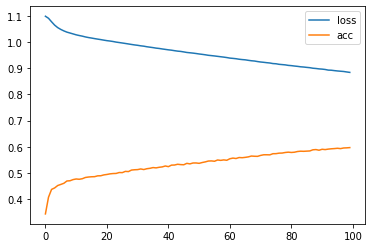

In [53]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = history.epoch
hist_df[['loss','acc']].plot()

## Sanity Check : same model on random input

In [54]:
x_trn_rndm = np.random.uniform(size=x_trn.shape)
sanity_model = get_model(filter_sz,out_sz)
lr = 0.0001

optimizer = tf.keras.optimizers.Adam(lr)
    
loss_type = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
sanity_model.compile(loss=loss_type,
                optimizer=optimizer,
                metrics=['acc'])
EPOCHS = 100
history = sanity_model.fit(x_trn_rndm,y_trn,epochs=EPOCHS,validation_data=(x_trn,y_trn),verbose=1)

Epoch 1/100
537/537 [==============================] - 2s 3ms/step - loss: 1.0986 - acc: 0.3419 - val_loss: 1.0983 - val_acc: 0.3401
Epoch 2/100
537/537 [==============================] - 1s 3ms/step - loss: 1.0985 - acc: 0.3342 - val_loss: 1.0981 - val_acc: 0.3464
Epoch 3/100
537/537 [==============================] - 1s 3ms/step - loss: 1.0983 - acc: 0.3377 - val_loss: 1.0984 - val_acc: 0.3415
Epoch 4/100
537/537 [==============================] - 1s 3ms/step - loss: 1.0984 - acc: 0.3382 - val_loss: 1.0983 - val_acc: 0.3406
Epoch 5/100
537/537 [==============================] - 2s 3ms/step - loss: 1.0983 - acc: 0.3438 - val_loss: 1.0985 - val_acc: 0.3424
Epoch 6/100
537/537 [==============================] - 1s 3ms/step - loss: 1.0983 - acc: 0.3413 - val_loss: 1.0980 - val_acc: 0.3502
Epoch 7/100
537/537 [==============================] - 2s 3ms/step - loss: 1.0984 - acc: 0.3334 - val_loss: 1.0999 - val_acc: 0.3266
Epoch 8/100
537/537 [==============================] - 1s 3ms/step - 

<AxesSubplot:>

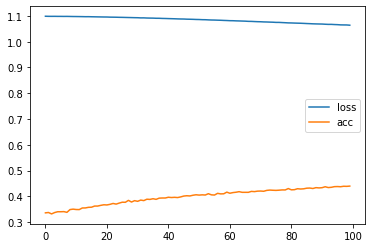

In [55]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = history.epoch
hist_df[['loss','acc']].plot()

Inference : Conditional on the memorizability of the model, I am certain that the input data has some structure that allows us to predict future.

## Building a model on full data.

In [60]:
def get_model_input(all_data,days_list,preprocessor,feat_transfm,y_transfm,y_step = 10,out_col = 'mideth',out_cls=3,on_train=True,return_true_labels=False):
    day_wise_data = []
    start = 0
    true_data  = []
    print(f'processing {days_list}')
    for day in days_list:
        one_day = all_data[all_data['date'] == day].copy()
        resampled_data = one_day.resample('5s').asfreq().interpolate().drop(['time','date','usdinr'],axis=1)
        # Adding indicators
        print(f'{day} processing {len(resampled_data)} rows')
        feat = get_features(resampled_data,config,preprocessor)
        # Adding extra features
        diff_btc = (resampled_data['midbtc_ftx']-resampled_data['midbtc'])/resampled_data['midbtc']
        diff_eth = (resampled_data['mideth_ftx']-resampled_data['mideth'])/resampled_data['mideth']
        feat['diff_btc'] = diff_btc
        feat['diff_eth'] = diff_eth
        max_seconds = 24*60*60
        seconds = pd.Series(resampled_data.index.time).apply(get_seconds)/max_seconds
        seconds.index = resampled_data.index
        feat['z_seconds'] = seconds
        y_out = (resampled_data[out_col].shift(-y_step)-resampled_data[out_col])/resampled_data[out_col]
        feat['y'] = y_out
        feat.sort_index(axis=1,inplace=True)
        if return_true_labels:
            orig = feat.copy()
            orig[out_col] = resampled_data[out_col]
            orig['fut_price'] = resampled_data[out_col].shift(-y_step)
            orig['time'] = feat.index
        feat.index = pd.Series(data=np.array(range(start,start+len(feat))))
        start += len(feat)
        day_wise_data.append(feat.copy())
        if return_true_labels:
            orig.index = feat.index
            true_data.append(orig.copy())
    # Transforming the data
    #feat_transfm  = PercentileTransfm()
    #y_trnsfm = PercentileTransfm()
    #out_col = ['y']
    feat = pd.concat(day_wise_data)
    if on_train:
        transfmd_feat = feat_transfm.fit_transfm(feat.dropna().drop(['y'],axis=1),n_cls=100)
        trnsfmd_y = y_trnsfm.fit_transfm(feat.dropna()[['y']],n_cls=out_cls,leave_as_class=True)
    else:
        transfmd_feat = feat_transfm.transform(feat.dropna().drop(['y'],axis=1),n_cls=100)
        trnsfmd_y = y_trnsfm.transform(feat.dropna()[['y']],n_cls=out_cls,leave_as_class=True)
        
    x_trn,y_trn = transfmd_feat.values,trnsfmd_y['y'].values
    if return_true_labels:
        true_data = pd.concat(true_data).dropna()
        
    return feat_transfm,y_transfm,x_trn,y_trn,true_data[['time',out_col,'y','fut_price']].copy() if return_true_labels else []
    





        
        


In [61]:
test_unseen_days

array([datetime.date(2021, 3, 23)], dtype=object)

In [67]:
feat_transfm = PercentileTransfm()
y_trnsfm = PercentileTransfm()
preprocessor = Preprocessor()
feat_transfm,y_trnsfm,x_trn,y_trn,_ = get_model_input(new_t,train_days,preprocessor,feat_transfm,y_trnsfm)
feat_transfm,y_trnsfm,x_vld,y_vld,true_vld = get_model_input(new_t,valid_days,preprocessor,feat_transfm,y_trnsfm,on_train=False,return_true_labels=True)
feat_transfm,y_trnsfm,x_unseen,y_unseen,true_unseen = get_model_input(new_t,test_unseen_days,preprocessor,feat_transfm,y_trnsfm,on_train=False,return_true_labels=True)

#out = get_model_input(new_t,train_days,preprocessor,feat_transfm,y_trnsfm)

processing [datetime.date(2021, 3, 14) datetime.date(2021, 3, 5)
 datetime.date(2021, 3, 4) datetime.date(2021, 3, 6)
 datetime.date(2021, 3, 2)]
2021-03-14 processing 17260 rows
2021-03-05 processing 17280 rows
2021-03-04 processing 17267 rows
2021-03-06 processing 17280 rows
2021-03-02 processing 17270 rows
processing [datetime.date(2021, 3, 13) datetime.date(2021, 3, 7)]
2021-03-13 processing 17258 rows
2021-03-07 processing 17280 rows
processing [datetime.date(2021, 3, 23)]
2021-03-23 processing 17280 rows


In [68]:
x_trn.shape,y_trn.shape,x_vld.shape,y_vld.shape


((85812, 203), (85812,), (34320, 203), (34320,))

In [69]:
def add_dummy_feat(x):
    sz = math.ceil(np.sqrt(x.shape[-1]))
    dummy_row_sz = sz*sz - (x.shape[-1])
    np.random.seed(0)
    dummy_vals = np.random.uniform(size=(x.shape[0],dummy_row_sz))
    x = np.concatenate([x,dummy_vals],axis=1)
    return x

In [70]:
from tensorflow.keras.utils import to_categorical

x_trn,x_vld,x_unseen = add_dummy_feat(x_trn),add_dummy_feat(x_vld),add_dummy_feat(x_unseen)

x_trn,x_vld,x_unseen = x_trn.reshape(x_trn.shape[0],15,15,1),x_vld.reshape(x_vld.shape[0],15,15,1),x_unseen.reshape(x_unseen.shape[0],15,15,1)

y_trn,y_vld,y_unseen = to_categorical(y_trn),to_categorical(y_vld),to_categorical(y_unseen)

In [71]:
x_trn.shape,y_trn.shape,x_vld.shape,y_vld.shape


((85812, 15, 15, 1), (85812, 3), (34320, 15, 15, 1), (34320, 3))

In [72]:
filter_sz,out_sz

(16, 3)

In [177]:
full_model = get_model(filter_sz,out_sz)
lr = 0.0001

optimizer = tf.keras.optimizers.Adam(lr)
    
loss_type = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
full_model.compile(loss=loss_type,
                optimizer=optimizer,
                metrics=['acc'])
EPOCHS = 100
history = full_model.fit(x_trn,y_trn,epochs=EPOCHS,validation_data=(x_vld,y_vld),verbose=1)

Epoch 1/100
2682/2682 [==============================] - 6s 2ms/step - loss: 1.0907 - acc: 0.3827 - val_loss: 1.0722 - val_acc: 0.4330
Epoch 2/100
2682/2682 [==============================] - 6s 2ms/step - loss: 1.0675 - acc: 0.4334 - val_loss: 1.0590 - val_acc: 0.4555
Epoch 3/100
2682/2682 [==============================] - 6s 2ms/step - loss: 1.0558 - acc: 0.4483 - val_loss: 1.0516 - val_acc: 0.4595
Epoch 4/100
2682/2682 [==============================] - 6s 2ms/step - loss: 1.0495 - acc: 0.4545 - val_loss: 1.0480 - val_acc: 0.4593
Epoch 5/100
2682/2682 [==============================] - 6s 2ms/step - loss: 1.0476 - acc: 0.4521 - val_loss: 1.0451 - val_acc: 0.4594
Epoch 6/100
2682/2682 [==============================] - 6s 2ms/step - loss: 1.0432 - acc: 0.4569 - val_loss: 1.0449 - val_acc: 0.4626
Epoch 7/100
2682/2682 [==============================] - 6s 2ms/step - loss: 1.0413 - acc: 0.4616 - val_loss: 1.0426 - val_acc: 0.4634
Epoch 8/100
2682/2682 [==============================] 

In [178]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = history.epoch
hist_df.head(2)

,loss,acc,val_loss,val_acc,epoch
0,1.083379,0.401494,1.072165,0.432955,0
1,1.064400,0.438855,1.058990,0.455507,1


<AxesSubplot:>

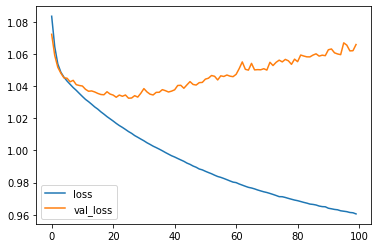

In [180]:
hist_df[['loss','val_loss']].plot()

<AxesSubplot:>

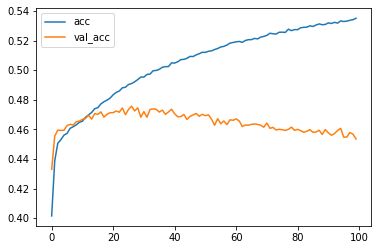

In [181]:
hist_df[['acc','val_acc']].plot()

In [224]:
hist_df.iloc[hist_df['val_loss'].rolling(10).mean().argmin()]

loss         1.008161
acc          0.493672
val_loss     1.033128
val_acc      0.474563
epoch       28.000000
Name: 28, dtype: float64

## Train and saving the best model on valid.

In [73]:

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [274]:
full_model = get_model(filter_sz,out_sz)
lr = 0.0001

optimizer = tf.keras.optimizers.Adam(lr)
    
loss_type = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
full_model.compile(loss=loss_type,
                optimizer=optimizer,
                metrics=['acc'])
EPOCHS = 100
#storage_path = './outputs'
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min',restore_best_weights=True)
#mcp_save = ModelCheckpoint(storage_path, save_best_only=True, monitor='val_loss', mode='min')
#reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, epsilon=1e-4, mode='min')




history = full_model.fit(x_trn,y_trn,epochs=EPOCHS,validation_data=(x_vld,y_vld),verbose=1,callbacks=[earlyStopping])

Epoch 1/100
2682/2682 [==============================] - 7s 2ms/step - loss: 1.0956 - acc: 0.3353 - val_loss: 1.0961 - val_acc: 0.3112
Epoch 2/100
2682/2682 [==============================] - 6s 2ms/step - loss: 1.0896 - acc: 0.3330 - val_loss: 1.0957 - val_acc: 0.3112
Epoch 3/100
2682/2682 [==============================] - 6s 2ms/step - loss: 1.0864 - acc: 0.3400 - val_loss: 1.0816 - val_acc: 0.3882
Epoch 4/100
2682/2682 [==============================] - 6s 2ms/step - loss: 1.0764 - acc: 0.3944 - val_loss: 1.0763 - val_acc: 0.3955
Epoch 5/100
2682/2682 [==============================] - 6s 2ms/step - loss: 1.0715 - acc: 0.3981 - val_loss: 1.0737 - val_acc: 0.3965
Epoch 6/100
2682/2682 [==============================] - 6s 2ms/step - loss: 1.0716 - acc: 0.3958 - val_loss: 1.0724 - val_acc: 0.3968
Epoch 7/100
2682/2682 [==============================] - 6s 2ms/step - loss: 1.0668 - acc: 0.4015 - val_loss: 1.0722 - val_acc: 0.3980
Epoch 8/100
2682/2682 [==============================] 

In [275]:
y_predict_unseen = full_model(x_unseen)

In [276]:
layers.Softmax(axis=1)(y_predict_unseen)

<tf.Tensor: shape=(17171, 3), dtype=float32, numpy=
array([[0.25921512, 0.39755988, 0.34322503],
       [0.22682756, 0.35450247, 0.41866997],
       [0.23127383, 0.34153816, 0.42718804],
       ...,
       [0.31973174, 0.2342579 , 0.44601035],
       [0.30743974, 0.24075101, 0.45180926],
       [0.29820684, 0.22604682, 0.4757463 ]], dtype=float32)>

In [246]:
y_predict_train = full_model(x_trn)
layers.Softmax(axis=1)(y_predict_train)

<tf.Tensor: shape=(85812, 3), dtype=float32, numpy=
array([[0.2679944 , 0.4640112 , 0.2679944 ],
       [0.26866984, 0.4626603 , 0.26866984],
       [0.26714617, 0.46570757, 0.26714617],
       ...,
       [0.300971  , 0.39805794, 0.300971  ],
       [0.33333334, 0.33333334, 0.33333334],
       [0.33333334, 0.33333334, 0.33333334]], dtype=float32)>

In [277]:
y_predict_vld = full_model(x_vld)
y_predict_vld = layers.Softmax(axis=1)(y_predict_vld)

In [278]:
y_predict_vld

<tf.Tensor: shape=(34320, 3), dtype=float32, numpy=
array([[0.3279654 , 0.37869808, 0.29333645],
       [0.31322843, 0.4025562 , 0.28421542],
       [0.32031187, 0.35340852, 0.32627955],
       ...,
       [0.23184636, 0.5793032 , 0.18885046],
       [0.2822456 , 0.5254651 , 0.19228932],
       [0.2897611 , 0.5107821 , 0.19945675]], dtype=float32)>

In [284]:
y_predict_vld.numpy()

array([[0.3279654 , 0.37869808, 0.29333645],
       [0.31322843, 0.4025562 , 0.28421542],
       [0.32031187, 0.35340852, 0.32627955],
       ...,
       [0.23184636, 0.5793032 , 0.18885046],
       [0.2822456 , 0.5254651 , 0.19228932],
       [0.2897611 , 0.5107821 , 0.19945675]], dtype=float32)

In [285]:
true_vld['predicted_probs'] = y_predict_vld.numpy()

In [287]:
true_vld['predicted_probs'].iloc[0]

0.3279654

In [288]:
true_vld.drop(['predicted_probs'],axis=1,inplace=True)

In [290]:
true_vld['prob_0'] = y_predict_vld.numpy()[:,0]
true_vld['prob_1'] = y_predict_vld.numpy()[:,1]
true_vld['prob_2'] = y_predict_vld.numpy()[:,2]
true_vld

,time,mideth,y,fut_price,prob_0,prob_1,prob_2
99,2021-03-13 00:10:00,133712.75,0.000000,133712.75,0.327965,0.378698,0.293336
100,2021-03-13 00:10:05,133712.75,0.000000,133712.75,0.313228,0.402556,0.284215
101,2021-03-13 00:10:10,133740.00,-0.000204,133712.75,0.320312,0.353409,0.326280
102,2021-03-13 00:10:15,133712.75,0.000000,133712.75,0.334580,0.374266,0.291154
103,2021-03-13 00:10:20,133712.75,0.000000,133712.75,0.317957,0.388296,0.293747
...,...,...,...,...,...,...,...
34523,2021-03-07 23:58:45,124800.00,0.000000,124800.00,0.351079,0.483407,0.165514
34524,2021-03-07 23:58:50,124800.00,0.000000,124800.00,0.322305,0.525565,0.152130
34525,2021-03-07 23:58:55,124800.00,0.000000,124800.00,0.231846,0.579303,0.188850
34526,2021-03-07 23:59:00,124800.00,0.000000,124800.00,0.282246,0.525465,0.192289


In [291]:
!pwd

/home/vinay/Downloads/projects/supervised_prediction/nbs


In [293]:
true_vld.to_csv('./outputs/predictions_50.csv')

## Finding best future step

In [74]:
y_steps = [10,20,30,50]
from collections import defaultdict
val_stats = defaultdict()

for step in y_steps:
    feat_transfm = PercentileTransfm()
    y_trnsfm = PercentileTransfm()
    preprocessor = Preprocessor()
    feat_transfm,y_trnsfm,x_trn,y_trn,_ = get_model_input(new_t,train_days,preprocessor,feat_transfm,y_trnsfm,y_step=step)
    feat_transfm,y_trnsfm,x_vld,y_vld,true_vld = get_model_input(new_t,valid_days,preprocessor,feat_transfm,y_trnsfm,on_train=False,return_true_labels=True,y_step=step)
    feat_transfm,y_trnsfm,x_unseen,y_unseen,true_unseen = get_model_input(new_t,test_unseen_days,preprocessor,feat_transfm,y_trnsfm,on_train=False,return_true_labels=True,y_step=step)

    #out = get_model_input(new_t,train_days,preprocessor,feat_transfm,y_trnsfm)


    from tensorflow.keras.utils import to_categorical

    x_trn,x_vld,x_unseen = add_dummy_feat(x_trn),add_dummy_feat(x_vld),add_dummy_feat(x_unseen)

    x_trn,x_vld,x_unseen = x_trn.reshape(x_trn.shape[0],15,15,1),x_vld.reshape(x_vld.shape[0],15,15,1),x_unseen.reshape(x_unseen.shape[0],15,15,1)

    y_trn,y_vld,y_unseen = to_categorical(y_trn),to_categorical(y_vld),to_categorical(y_unseen)







    full_model = get_model(filter_sz,out_sz)
    lr = 0.0001

    optimizer = tf.keras.optimizers.Adam(lr)
    
    loss_type = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    full_model.compile(loss=loss_type,
                    optimizer=optimizer,
                    metrics=['acc'])
    EPOCHS = 100
    #storage_path = './outputs'
    earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min',restore_best_weights=True)
    #mcp_save = ModelCheckpoint(storage_path, save_best_only=True, monitor='val_loss', mode='min')
    #reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, epsilon=1e-4, mode='min')




    history = full_model.fit(x_trn,y_trn,epochs=EPOCHS,validation_data=(x_vld,y_vld),verbose=1,callbacks=[earlyStopping])
    hist_df = pd.DataFrame(history.history)
    hist_df['epoch'] = history.epoch
    val_stats[str(step)] = [hist_df['val_loss'].min(),hist_df['val_acc'].max(),hist_df['epoch'].max()]
    

processing [datetime.date(2021, 3, 14) datetime.date(2021, 3, 5)
 datetime.date(2021, 3, 4) datetime.date(2021, 3, 6)
 datetime.date(2021, 3, 2)]
2021-03-14 processing 17260 rows
2021-03-05 processing 17280 rows
2021-03-04 processing 17267 rows
2021-03-06 processing 17280 rows
2021-03-02 processing 17270 rows
processing [datetime.date(2021, 3, 13) datetime.date(2021, 3, 7)]
2021-03-13 processing 17258 rows
2021-03-07 processing 17280 rows
processing [datetime.date(2021, 3, 23)]
2021-03-23 processing 17280 rows
Epoch 1/100
2682/2682 [==============================] - 7s 2ms/step - loss: 1.0951 - acc: 0.3657 - val_loss: 1.0738 - val_acc: 0.4335
Epoch 2/100
2682/2682 [==============================] - 6s 2ms/step - loss: 1.0772 - acc: 0.4156 - val_loss: 1.0630 - val_acc: 0.4413
Epoch 3/100
2682/2682 [==============================] - 6s 2ms/step - loss: 1.0707 - acc: 0.4245 - val_loss: 1.0586 - val_acc: 0.4487
Epoch 4/100
2682/2682 [==============================] - 6s 2ms/step - loss: 1.

In [81]:
y_predict_vld = full_model(x_vld)
y_predict_vld = layers.Softmax(axis=1)(y_predict_vld)
true_vld['prob_0'] = y_predict_vld.numpy()[:,0]
true_vld['prob_1'] = y_predict_vld.numpy()[:,1]
true_vld['prob_2'] = y_predict_vld.numpy()[:,2]
true_vld


,time,mideth,y,fut_price,prob_0,prob_1,prob_2
99,2021-03-13 00:10:00,133712.75,-0.000145,133693.3,0.225940,0.431555,0.342506
100,2021-03-13 00:10:05,133712.75,-0.000145,133693.3,0.273720,0.439518,0.286762
101,2021-03-13 00:10:10,133740.00,-0.000349,133693.3,0.203361,0.385050,0.411589
102,2021-03-13 00:10:15,133712.75,-0.000145,133693.3,0.215092,0.416143,0.368765
103,2021-03-13 00:10:20,133712.75,-0.000145,133693.3,0.242739,0.384429,0.372831
...,...,...,...,...,...,...,...
34483,2021-03-07 23:55:25,124756.25,0.000351,124800.0,0.350950,0.393333,0.255716
34484,2021-03-07 23:55:30,124756.25,0.000351,124800.0,0.233673,0.470005,0.296322
34485,2021-03-07 23:55:35,124756.25,0.000351,124800.0,0.306942,0.487235,0.205823
34486,2021-03-07 23:55:40,124756.25,0.000351,124800.0,0.215166,0.527405,0.257429


In [103]:
#true_vld.to_csv('./outputs/predictions_250.csv')
t_vld = pd.read_csv('./outputs/predictions_50.csv')
t_vld['long'] = t_vld['prob_2']-t_vld['prob_0']
t_vld['short'] = t_vld['prob_0']-t_vld['prob_2']
top_long = t_vld['long'].quantile(.90)
top_short = t_vld['short'].quantile(0.90)
((t_vld[t_vld['long']>=top_long]['fut_price']-t_vld[t_vld['long']>=top_long]['mideth'])/t_vld[t_vld['long']>=top_long]['mideth']).mean()*10000

5.810788328692522

In [101]:

(t_vld[t_vld['short']>=top_long]['fut_price']-t_vld[t_vld['short']>=top_long]['mideth']).mean()

-64.29601157141899

In [120]:
train_days

array([datetime.date(2021, 3, 14), datetime.date(2021, 3, 5),
       datetime.date(2021, 3, 4), datetime.date(2021, 3, 6),
       datetime.date(2021, 3, 2)], dtype=object)

In [121]:
valid_days

array([datetime.date(2021, 3, 13), datetime.date(2021, 3, 7)],
      dtype=object)

In [84]:
true_vld['long'] = true_vld['prob_2']-true_vld['prob_0']
true_vld['short'] = true_vld['prob_0']-true_vld['prob_2']



In [117]:
top_long = true_vld['long'].quantile(.98)
top_short = true_vld['short'].quantile(0.98)

In [118]:
((true_vld[true_vld['long']>=top_long]['fut_price']-true_vld[true_vld['long']>=top_long]['mideth'])/true_vld[true_vld['long']>=top_long]['mideth']).mean()*10000

20.63091609716079

In [119]:
((true_vld[true_vld['short']>=top_short]['fut_price']-true_vld[true_vld['short']>=top_short]['mideth'])/true_vld[true_vld['short']>top_short]['mideth']).mean()*10000

-18.497215754436727

In [123]:
y_predict_vld = full_model(x_unseen)
y_predict_vld = layers.Softmax(axis=1)(y_predict_vld)
true_unseen['prob_0'] = y_predict_vld.numpy()[:,0]
true_unseen['prob_1'] = y_predict_vld.numpy()[:,1]
true_unseen['prob_2'] = y_predict_vld.numpy()[:,2]
true_unseen


,time,mideth,y,fut_price,prob_0,prob_1,prob_2
99,2021-03-23 00:08:15,133959.9,-0.001002,133825.650000,0.274809,0.237785,0.487406
100,2021-03-23 00:08:20,133959.9,-0.001002,133825.633333,0.214780,0.233413,0.551807
101,2021-03-23 00:08:25,133959.9,-0.001002,133825.616667,0.217223,0.230371,0.552407
102,2021-03-23 00:08:30,133959.9,-0.001003,133825.600000,0.185994,0.249641,0.564366
103,2021-03-23 00:08:35,133959.9,-0.001003,133825.583333,0.189201,0.214854,0.595945
...,...,...,...,...,...,...,...
17225,2021-03-23 23:55:25,130463.3,-0.002807,130097.150000,0.264672,0.577391,0.157937
17226,2021-03-23 23:55:30,130463.3,-0.002807,130097.150000,0.262125,0.484863,0.253012
17227,2021-03-23 23:55:35,130463.3,-0.002807,130097.150000,0.263764,0.523705,0.212531
17228,2021-03-23 23:55:40,130463.3,-0.002807,130097.150000,0.254506,0.430978,0.314516


In [125]:
true_unseen['long'] = true_unseen['prob_2']-true_unseen['prob_0']
true_unseen['short'] = true_unseen['prob_0']-true_unseen['prob_2']

top_long = true_unseen['long'].quantile(.98)
top_short = true_unseen['short'].quantile(0.98)

In [126]:
((true_unseen[true_unseen['long']>=top_long]['fut_price']-true_unseen[true_unseen['long']>=top_long]['mideth'])/true_unseen[true_unseen['long']>=top_long]['mideth']).mean()*10000

14.305898276630172

In [127]:
((true_unseen[true_unseen['short']>=top_short]['fut_price']-true_unseen[true_unseen['short']>=top_short]['mideth'])/true_unseen[true_unseen['short']>=top_long]['mideth']).mean()*10000

-26.77044059483889

# Trying fancy shit.

## Cyclical learning rates

In [115]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.metrics import binary_accuracy
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import *

class CyclicLR(keras.callbacks.Callback):
    
    def __init__(self,base_lr, max_lr, step_size, base_m, max_m, cyclical_momentum):
 
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.base_m = base_m
        self.max_m = max_m
        self.cyclical_momentum = cyclical_momentum
        self.step_size = step_size
        
        self.clr_iterations = 0.
        self.cm_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}
        
    def clr(self):
        
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        
        if cycle == 2:
            x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)          
            return self.base_lr-(self.base_lr-self.base_lr/100)*np.maximum(0,(1-x))
        
        else:
            x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
            return self.base_lr + (self.max_lr-self.base_lr)*np.maximum(0,(1-x))
    
    def cm(self):
        
        cycle = np.floor(1+self.clr_iterations/(2*self.step_size))
        
        if cycle == 2:
            
            x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1) 
            return self.max_m
        
        else:
            x = np.abs(self.clr_iterations/self.step_size - 2*cycle + 1)
            return self.max_m - (self.max_m-self.base_m)*np.maximum(0,(1-x))
        
        
    def on_train_begin(self, logs={}):
        logs = logs or {}

        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())
            
        if self.cyclical_momentum == True:
            if self.clr_iterations == 0:
                K.set_value(self.model.optimizer.momentum, self.cm())
            else:
                K.set_value(self.model.optimizer.momentum, self.cm())
            
            
    def on_batch_begin(self, batch, logs=None):
        
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1

        self.history.setdefault('lr', []).append(K.get_value(self.model.optimizer.lr))
        self.history.setdefault('iterations', []).append(self.trn_iterations)
        
        if self.cyclical_momentum == True:
            self.history.setdefault('momentum', []).append(K.get_value(self.model.optimizer.momentum))

        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        
        K.set_value(self.model.optimizer.lr, self.clr())
        
        if self.cyclical_momentum == True:
            K.set_value(self.model.optimizer.momentum, self.cm())

In [116]:
#batch_size = 64
#epochs = 10
max_lr = 0.0005
base_lr = max_lr/10
max_m = 0.98
base_m = 0.85

cyclical_momentum = True
#augment = True
cycles = 2.35

iterations = round(len(train_list)/batch_size*epochs)
iterations = list(range(0,iterations+1))
step_size = len(iterations)/(cycles)
clr =  CyclicLR(base_lr=base_lr,
                max_lr=max_lr,
                step_size=step_size,
                max_m=max_m,
                base_m=base_m,
                cyclical_momentum=cyclical_momentum)
    
    
y_steps = [50]
from collections import defaultdict
val_stats = defaultdict()

for step in y_steps:
    feat_transfm = PercentileTransfm()
    y_trnsfm = PercentileTransfm()
    preprocessor = Preprocessor()
    feat_transfm,y_trnsfm,x_trn,y_trn,_ = get_model_input(new_t,train_days,preprocessor,feat_transfm,y_trnsfm,y_step=step)
    feat_transfm,y_trnsfm,x_vld,y_vld,true_vld = get_model_input(new_t,valid_days,preprocessor,feat_transfm,y_trnsfm,on_train=False,return_true_labels=True,y_step=step)
    feat_transfm,y_trnsfm,x_unseen,y_unseen,true_unseen = get_model_input(new_t,test_unseen_days,preprocessor,feat_transfm,y_trnsfm,on_train=False,return_true_labels=True,y_step=step)

    #out = get_model_input(new_t,train_days,preprocessor,feat_transfm,y_trnsfm)


    from tensorflow.keras.utils import to_categorical

    x_trn,x_vld,x_unseen = add_dummy_feat(x_trn),add_dummy_feat(x_vld),add_dummy_feat(x_unseen)

    x_trn,x_vld,x_unseen = x_trn.reshape(x_trn.shape[0],15,15,1),x_vld.reshape(x_vld.shape[0],15,15,1),x_unseen.reshape(x_unseen.shape[0],15,15,1)
    
    from tensorflow.keras.utils import to_categorical

    x_trn,x_vld,x_unseen = add_dummy_feat(x_trn),add_dummy_feat(x_vld),add_dummy_feat(x_unseen)

    x_trn,x_vld,x_unseen = x_trn.reshape(x_trn.shape[0],15,15,1),x_vld.reshape(x_vld.shape[0],15,15,1),x_unseen.reshape(x_unseen.shape[0],15,15,1)

    y_trn,y_vld,y_unseen = to_categorical(y_trn),to_categorical(y_vld),to_categorical(y_unseen)







    full_model = get_model(filter_sz,out_sz)
    lr = 0.0000001

    optimizer = tf.keras.optimizers.Adam(lr)
    
    loss_type = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    full_model.compile(loss=loss_type,
                    optimizer=optimizer,
                    metrics=['acc'])
    
    EPOCHS = 100
    #storage_path = './outputs'
    #earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min',restore_best_weights=True)
    #mcp_save = ModelCheckpoint(storage_path, save_best_only=True, monitor='val_loss', mode='min')
    #reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, epsilon=1e-4, mode='min')




    history = full_model.fit(x_trn,y_trn,epochs=EPOCHS,validation_data=(x_vld,y_vld),verbose=1,callbacks=[clr])
    hist_df = pd.DataFrame(history.history)
    hist_df['epoch'] = history.epoch
    val_stats[str(step)] = [hist_df['val_loss'].min(),hist_df['val_acc'].max(),hist_df['epoch'].max()]
    


NameError: name 'step_size' is not defined